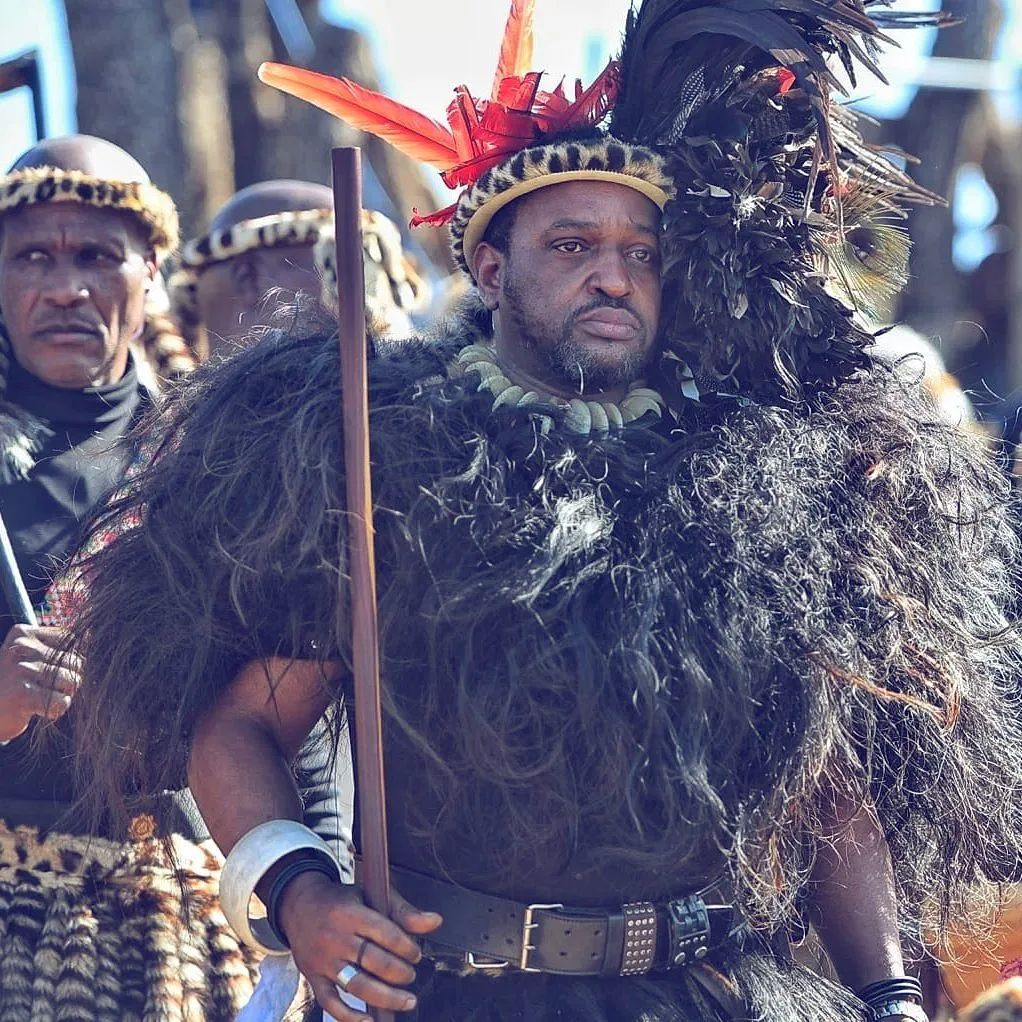

Image: _AmaZulu King Misuzulu kaZwelithini_

## Importing Libraries

In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import advertools as adv
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

## Importing Data

#### #About the data:

Tweets with keywords "Zulu", "Misuzulu" and "Simakade" were scraped between the 14th and 21st of August 2022.
I wanted to catch the emotions on the run up to the coronation.

The rest of the datasets were collected on the weekend (18/08 - 22/08) of the coronation.

In [2]:
mis = pd.read_csv("misuzulu-tweets.csv")
sim = pd.read_csv("simakade-tweets.csv")
sabc = pd.read_csv("sabc-coronation-tweets-unfiltered.csv")
enca = pd.read_csv("enca-coronation-tweets-unfiltered.csv")
esibayeni_hash = pd.read_csv("inkosiesibanyeni-tweets.csv")
zulu = pd.read_csv("zulu-query-tweets.csv")
goge = pd.read_csv("siphamandla_goge_tweets.csv")

In [3]:
mis.head()

Datetime             Tweet Id  \
0  2022-08-20 23:59:46+00:00  1561140968560201728   
1  2022-08-20 23:57:22+00:00  1561140366417567745   
2  2022-08-20 23:56:49+00:00  1561140226830901248   
3  2022-08-20 23:55:42+00:00  1561139944579649539   
4  2022-08-20 23:55:35+00:00  1561139917245358081   

                                                Text         Username  
0                 @Misuzuluking Bayede wena weNdlovu  Mseminho_Shandu  
1                   @Misuzuluking Bayede Ndabezitha🤝       Thabani_sa  
2  Zulu King Misuzulu ka Zwelithini crowned in So...   worldnews_guru  
3  @SadReal93904456 @Misuzuluking The only proble...     Jeff46044381  
4  @Misuzuluking Gold and diamonds are not of val...      SbuThePract

In [4]:
mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  7650 non-null   object
 1   Tweet Id  7650 non-null   int64 
 2   Text      7650 non-null   object
 3   Username  7650 non-null   object
dtypes: int64(1), object(3)
memory usage: 239.2+ KB


#####
### Observations

* There are no missing rows
* Tweet Id column will have to be dropped
* Possible analysis to be done here:

Times of day tweets were coming in most.

Which accounts tweeted most

Extract hashtags, usernames, words, emojis

#####

In [5]:
sim.head()

Datetime             Tweet Id  \
0  2022-08-20 23:12:58+00:00  1561129191042650113   
1  2022-08-20 23:01:25+00:00  1561126286873042946   
2  2022-08-20 23:00:05+00:00  1561125949072150530   
3  2022-08-20 22:38:17+00:00  1561120465871052801   
4  2022-08-20 22:22:43+00:00  1561116547111845890   

                                                Text         Username  
0  @AdvDali_Mpofu I thought you  support  Prince ...  ThulaniMaphum17  
1  @Sane60257094 #Simakade Your Majesty. Bukhosi ...       Lola_Popla  
2  @UmntwanaKaZama My sentiments exactly......the...           MoiHlo  
3  @azania1023 The King is always reconciliatory,...  VictorMkhaliphi  
4  Reason why Simakade didn't come with the Anima...       Lungaissa3

In [6]:
sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  2278 non-null   object
 1   Tweet Id  2278 non-null   int64 
 2   Text      2278 non-null   object
 3   Username  2278 non-null   object
dtypes: int64(1), object(3)
memory usage: 71.3+ KB


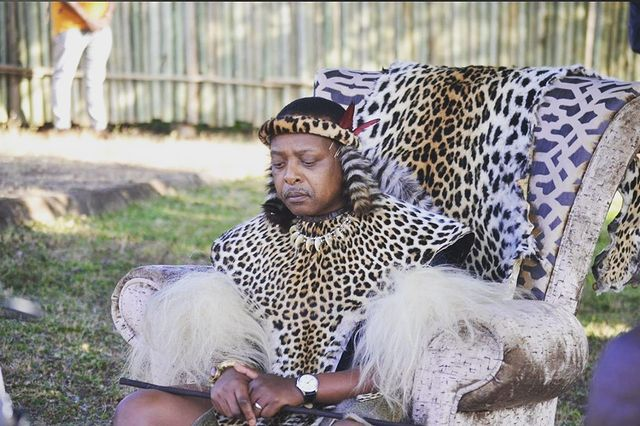

####
### Commentary

There was contention about the who amongst the late king's sons should succeed him on the throne.
One of the names put forward by some members of the royal family was Simakade Zulu
We'll attempt to see what kind of sentiments were around him on this particular weekend

####

In [7]:
sabc.head()

Datetime             Tweet Id  \
0  2022-08-21 23:43:23+00:00  1561499234037276674   
1  2022-08-21 23:11:31+00:00  1561491214544797697   
2  2022-08-21 22:32:09+00:00  1561481306613157895   
3  2022-08-21 21:50:42+00:00  1561470879258841088   
4  2022-08-21 19:42:53+00:00  1561438712583553025   

                                                Text  Username  
0  ICYMI: A Gugulethu beekeeper on the Cape Flats...  SABCNews  
1  ICYMI: In celebration of the life and legacy o...  SABCNews  
2  ICYMI: KwaKhangela Royal Palace in Nongoma nor...  SABCNews  
3  ICYMI: Quickfire goals by Erling Haaland and B...  SABCNews  
4  A Gugulethu beekeeper on the Cape Flats says h...  SABCNews

In [8]:
sabc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  186 non-null    object
 1   Tweet Id  186 non-null    int64 
 2   Text      186 non-null    object
 3   Username  186 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


####
### Commentary

The SABC is the national broadcaster in South Africa.
The tweets that were scraped are all the tweets they sent out between the 19th and 21st of August.
The tweets still need to be filtered into those that were about the coronation of King Misuzulu only.

####

In [9]:
enca.head()

Datetime             Tweet Id  \
0  2022-08-21 19:30:42+00:00  1561435645729447937   
1  2022-08-21 19:30:12+00:00  1561435517123690496   
2  2022-08-21 19:10:02+00:00  1561430442812837888   
3  2022-08-21 18:04:29+00:00  1561413948477513730   
4  2022-08-21 18:00:38+00:00  1561412978527854592   

                                                Text Username  
0  Krugersdorp gang rape victims want justice\nht...     eNCA  
1  [SPONSORED] From your hospital coverage to you...     eNCA  
2  Anime 'Dragon Ball' roars to top of North Amer...     eNCA  
3  Amathole water crisis plunges EC health sector...     eNCA  
4  Crime Watch | Property related crime statistic...     eNCA

In [10]:
enca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  300 non-null    object
 1   Tweet Id  300 non-null    int64 
 2   Text      300 non-null    object
 3   Username  300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


####
### Commentary 

The ENCA is a television news broadcaster in South Africa.
The broadcaster has major reach and we'll be interested in seeing their tweets around the coronation

####

In [11]:
zulu.head()

Datetime             Tweet Id  \
0  2022-08-20 23:59:56+00:00  1561141010507374593   
1  2022-08-20 23:59:21+00:00  1561140866416263170   
2  2022-08-20 23:58:52+00:00  1561140743841931269   
3  2022-08-20 23:58:36+00:00  1561140675751600128   
4  2022-08-20 23:58:33+00:00  1561140662153658372   

                                                Text         Username  
0  @AyoTinker Didn’t wanna be bias wit my slime J...        Zulu_WaRr  
1                            https://t.co/PSruAG91ae        Zulu_WaRr  
2                      @Zulu_WaRr No lies told... 🤙🏾     DaveAndretti  
3  @f1girlboss Facts. I just feel kind guilty tha...          Keiya_d  
4  New South African Zulu King dismisses challeng...  TheZimbabweMail

In [12]:
zulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35745 entries, 0 to 35744
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  35745 non-null  object
 1   Tweet Id  35745 non-null  int64 
 2   Text      35745 non-null  object
 3   Username  35745 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


####
### Commentary

These are all the tweets between the 19th and 21st of August 2022 with the keyword "Zulu"
This is to track the tweets around the coronation (What are the sentiments/questions/curiosities around the coronation)

####

In [13]:
goge.head()

Unnamed: 0                       Date             User  \
0           0  2022-08-21 18:52:14+00:00  SiphamandlaGoge   
1           1  2022-08-21 18:51:53+00:00  SiphamandlaGoge   
2           2  2022-08-21 18:46:19+00:00  SiphamandlaGoge   
3           3  2022-08-21 18:45:11+00:00  SiphamandlaGoge   
4           4  2022-08-21 18:44:07+00:00  SiphamandlaGoge   

                          Tweet  
0  @Noppsy88 @DimitryHlonisky 😂  
1     😅 https://t.co/RBiKCH0mXL  
2    🙈😅 https://t.co/M1mdzbiIz5  
3        @MathewsNtanzi Hahaha.  
4    😂😂 https://t.co/6W85bqZWqj

In [14]:
goge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  108 non-null    int64 
 1   Date        108 non-null    object
 2   User        108 non-null    object
 3   Tweet       108 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.5+ KB


####
### Commentary

One of the most prominent journalists who were on the ground at the royal palace.
Admittedly, he communicated more on live broadcasts with the general public than via social media.
Nevertheless, we'll take a look at his tweets on Coronation weekend

####

## Exploratory Data Analysis

### Hashtags Extraction

#### From "Zulu" keyword tweets

In [15]:
hashtag_summary = adv.extract_hashtags(zulu['Text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [16]:
hashtag_summary['overview'] 

{'num_posts': 35745,
 'num_hashtags': 8500,
 'hashtags_per_post': 0.23779549587354876,
 'unique_hashtags': 2225}

In [17]:
"""
Here we are looking at number of hashtags per tweet. In other words, how many tweets had no hashtags, one hashtag and so one
"""
hashtag_summary['hashtag_freq'][:15]

[(0, 31746),
 (1, 2283),
 (2, 750),
 (3, 365),
 (4, 214),
 (5, 146),
 (6, 84),
 (7, 52),
 (8, 24),
 (9, 16),
 (10, 19),
 (11, 10),
 (12, 6),
 (13, 9),
 (14, 5)]

In [18]:
"""
Hashtags that are showing up the most
"""

hashtag_summary['top_hashtags'][:15]

[('#inkosiesibayeni', 831),
 ('#zuluroyalfamily', 405),
 ('#150bars', 360),
 ('#zulu', 333),
 ('#misuzulu', 197),
 ('#kingmisuzulukazwelithini', 191),
 ('#bigzulu', 167),
 ('#bhutcinderella', 140),
 ('#behindtheveil', 138),
 ('#zulukingdom', 124),
 ('#nongoma', 99),
 ('#bayede', 70),
 ('#nowplaying', 68),
 ('#kingmisuzulu', 56),
 ('#bbnaija', 54)]

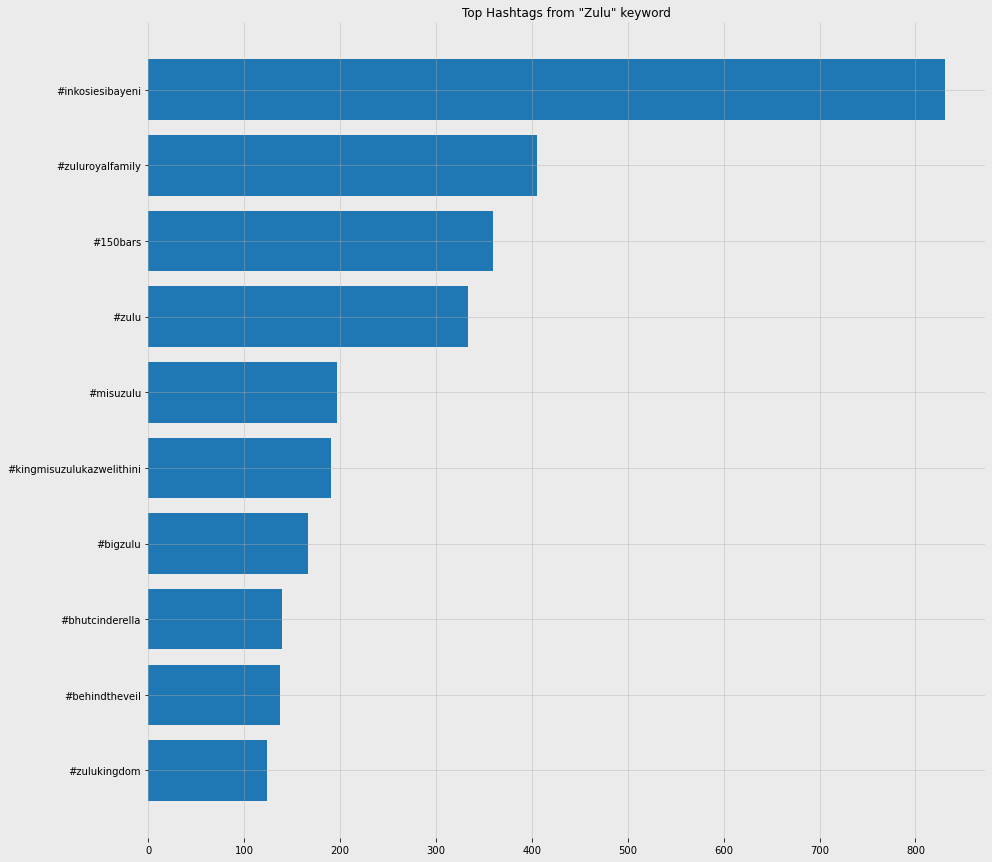

In [19]:
"""
Visualising the top hashtags
"""
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][0:][:10]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][0:][:10]][::-1])
plt.title('Top Hashtags from "Zulu" keyword')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#### From "Misuzulu" keyword tweets

In [20]:
mis_summary = adv.extract_hashtags(mis['Text'])
mis_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [21]:
mis_summary['overview'] 

{'num_posts': 7650,
 'num_hashtags': 5156,
 'hashtags_per_post': 0.6739869281045752,
 'unique_hashtags': 795}

In [22]:
"""
Hashtags that are showing up the most
"""

mis_summary['top_hashtags'][:15]

[('#misuzulu', 896),
 ('#inkosiesibayeni', 551),
 ('#zuluroyalfamily', 378),
 ('#kingmisuzulukazwelithini', 164),
 ('#bayede', 100),
 ('#zulu', 85),
 ('#nongoma', 83),
 ('#podcastandchillwithmacg', 79),
 ('#zulukingdom', 72),
 ('#bayededawg', 68),
 ('#kingmisuzulu', 68),
 ('#ukungenaesibayeni', 61),
 ('#simakade', 55),
 ('#mihlali', 52),
 ('#misuzulukazwelithini', 51)]

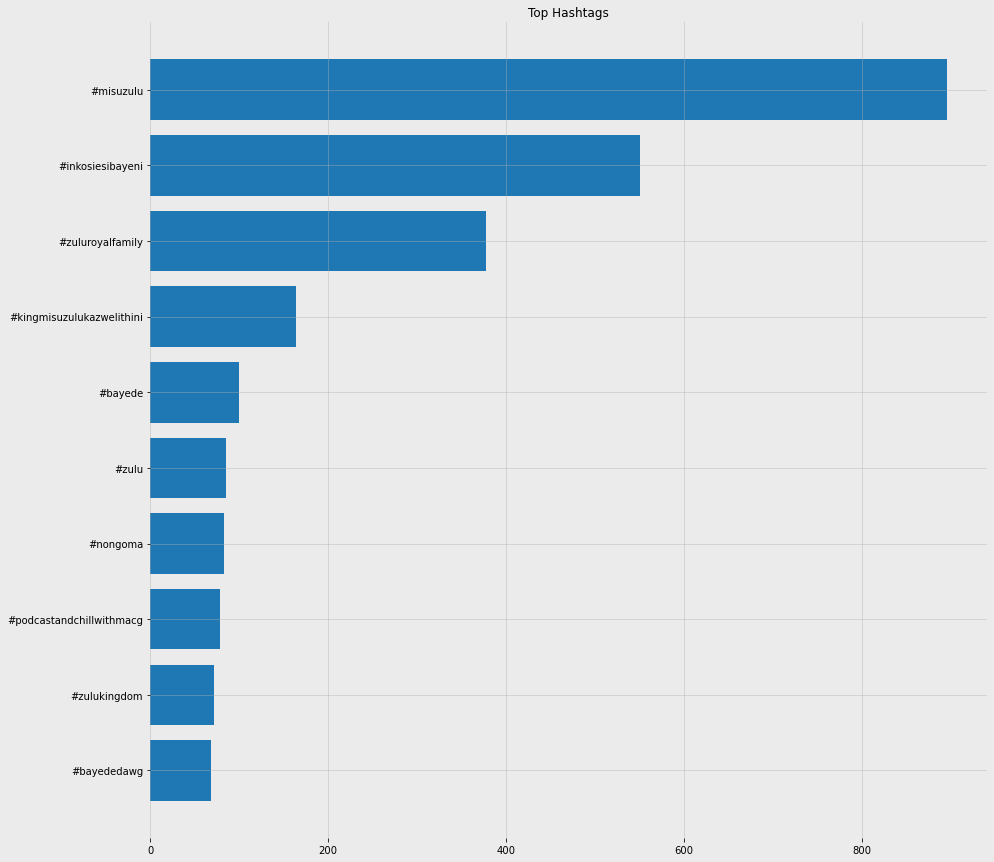

In [23]:
"""
Visualising the top hashtags
"""
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in mis_summary['top_hashtags'][0:][:10]][::-1],
         [x[1] for x in mis_summary['top_hashtags'][0:][:10]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#### From "Simakade" keyword tweets

In [24]:
sim_summary = adv.extract_hashtags(sim['Text'])
sim_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [25]:
"""
Hashtags that are showing up the most
"""

sim_summary['top_hashtags'][:15]

[('#simakade', 129),
 ('#inkosiesibayeni', 97),
 ('#misuzulu', 74),
 ('#zuluroyalfamily', 65),
 ('#mihlali', 29),
 ('#zulu', 24),
 ('#kingmisuzulukazwelithini', 23),
 ('#zulukingdom', 23),
 ('#jacobzuma', 22),
 ('#kingmisuzulu', 15),
 ('#riptokollotshabalala', 14),
 ('#jobseekerssa', 14),
 ('#nongoma', 14),
 ('#podcastandchillwithmacg', 14),
 ('#idolssa', 13)]

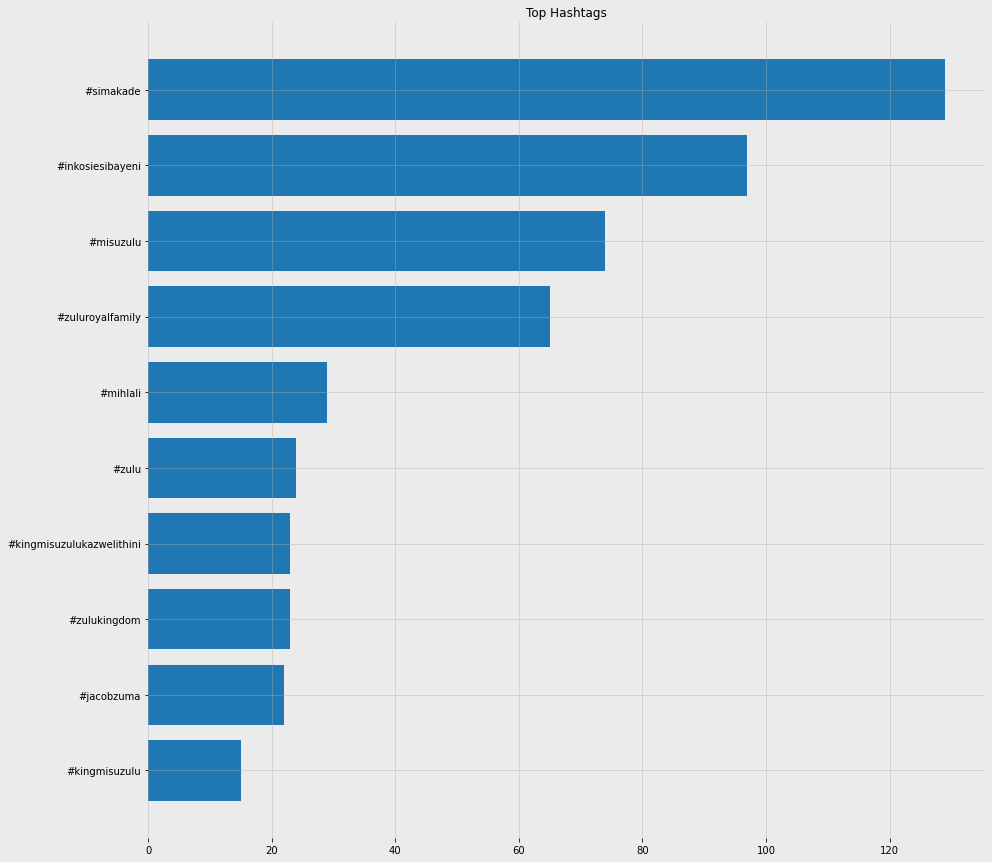

In [26]:
"""
Visualising the top hashtags
"""
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in sim_summary['top_hashtags'][0:][:10]][::-1],
         [x[1] for x in sim_summary['top_hashtags'][0:][:10]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#### From ENCA account 

In [27]:
enca_summary = adv.extract_hashtags(enca['Text'])
enca_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [28]:
enca_summary['top_hashtags'][:15]

[('#dstv403', 106),
 ('#enca', 45),
 ('#wethenation', 13),
 ('#southafricanmorning', 12),
 ('#onthespot', 8),
 ('#today', 7),
 ('#southafricatonight', 5),
 ('#newslink', 4),
 ('#newsnight', 4),
 ('#allangles', 2),
 ('#wsuitesummit2022', 1),
 ('#moneymatters', 1)]

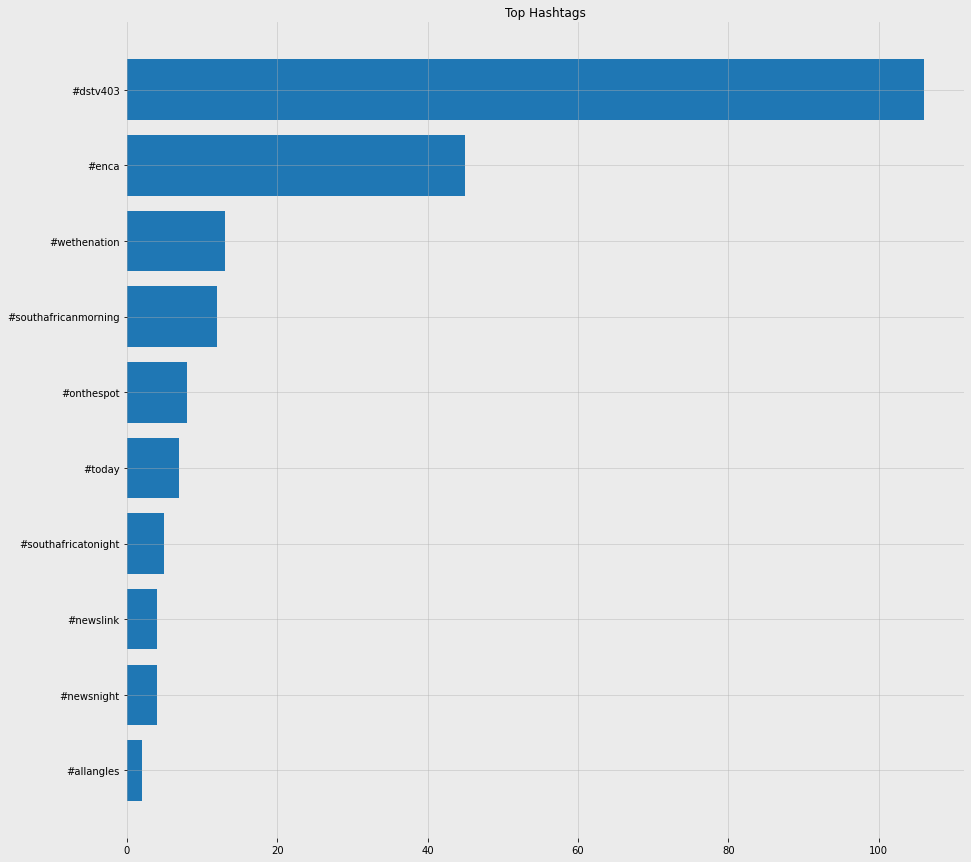

In [29]:
"""
Visualising the top hashtags
"""
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in enca_summary['top_hashtags'][0:][:10]][::-1],
         [x[1] for x in enca_summary['top_hashtags'][0:][:10]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [30]:
sabc_summary = adv.extract_hashtags(sabc['Text'])
sabc_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [31]:
sabc_summary['top_hashtags'][:15]

[('#zuluroyalfamily', 8),
 ('#sabcnews', 7),
 ('#crimestats', 7),
 ('#icymi', 6),
 ('#sabcweather', 4),
 ('#kingmisuzulu', 4),
 ('#monkeypox', 3),
 ('#phalaphala', 3),
 ('#riptokollotshabalala', 2),
 ('#potholes', 2),
 ('#roadinfrastructure', 2),
 ('#hillarygardee', 2),
 ('#nongoma', 1),
 ('#kzn', 1),
 ('#enochgodongwana', 1)]

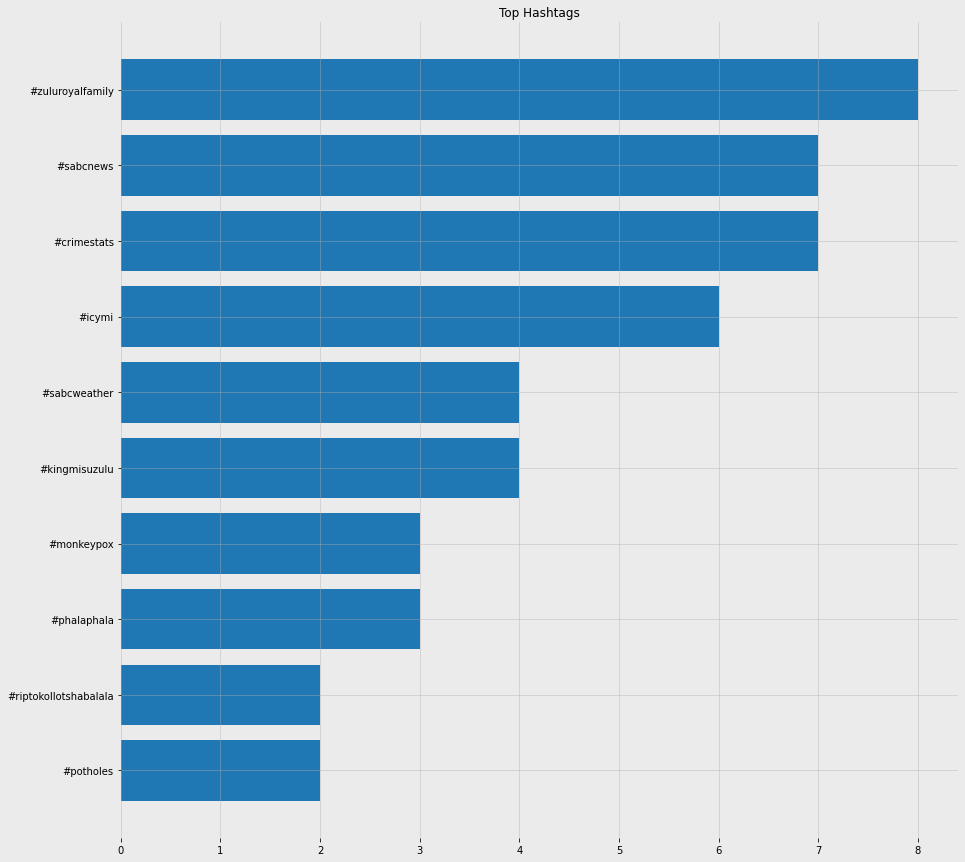

In [32]:
"""
Visualising the top hashtags
"""
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in sabc_summary['top_hashtags'][0:][:10]][::-1],
         [x[1] for x in sabc_summary['top_hashtags'][0:][:10]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

## Questions

What are the questions around the event?

In [33]:
zulu_summary = adv.extract_questions(zulu['Text'])

In [34]:
zulu_summary['overview']

{'num_posts': 35745,
 'num_question_marks': 5585,
 'question_marks_per_post': 0.15624562875926704,
 'unique_question_marks': 5}

In [35]:
"""
Different languages use different symbols for question marks. In our data we found just one variation of the standard English one
"""
zulu_summary['top_question_marks']

[('?', 5518), ('？', 28), ('¿', 25), ('؟', 12), ('⁉', 2)]

In [36]:
"""
100 Samples of questions asked
"""

[(i,x) for i, x in  enumerate(zulu_summary['question_text']) if x][:100]

[(14, ['Todo bien con #DuroContraElMundo PERO EMPEZAR CON YINA?']),
 (31, ['@damekayla Fuck they waiting on?']),
 (49, ['Bathong lenna Bug Zulu?']),
 (58, ['No mara Big Zulu wenzeni u-Emtee?']),
 (73, ['@DimitryHlonisky King yakabani?', 'Safa or Zulu Nation?']),
 (125, ['@TMukhavele @macdonaldmtilen Serious??']),
 (140, ['Wait so Big Zulu is Bi??', 'As in Bisexual??']),
 (174,
  ['What is bothering you,where do you fit there?',
   "Can't you mind your own business?"]),
 (185,
  ["@ThabisoMAG2 @teiayaah @MokgalabeGauta Nah man I'm not Zulu i understand you very but how old are you ?"]),
 (195,
  ['90% of them that get arrested there are your Zulu brothers including that Zulu brother of yours that  killed 7 South African women?']),
 (229,
  ['@visegrad24 @KremlinTrolls Wonder if she bumped into @BorisJohnson out there?']),
 (241, ['How will you see the king?']),
 (250, ['So who is Kim yung Zulu?']),
 (288, ['@CaptainZyloh You guys want a real meme?']),
 (299,
  ['@r4cc02 @Rogue00223 @Zul

## Emojis

In [37]:
emoji_summary = adv.extract_emoji(zulu['Text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [38]:
emoji_summary['overview']

{'num_posts': 35745,
 'num_emoji': 30969,
 'emoji_per_post': 0.8663869072597566,
 'unique_emoji': 870}

In [39]:
emoji_summary['top_emoji'][:15]

[('😂', 5457),
 ('🤣', 4039),
 ('😭', 3738),
 ('🔥', 3674),
 ('❤️', 601),
 ('🙌', 443),
 ('😅', 412),
 ('😍', 376),
 ('🤔', 324),
 ('🥺', 300),
 ('👑', 282),
 ('🙏', 259),
 ('🙌🏾', 251),
 ('😩', 245),
 ('💀', 233)]

## Sentiment Analysis

In [41]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
zulu["Text"] = zulu["Text"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Mlondi
[nltk_data]     Shoba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating a WordCloud

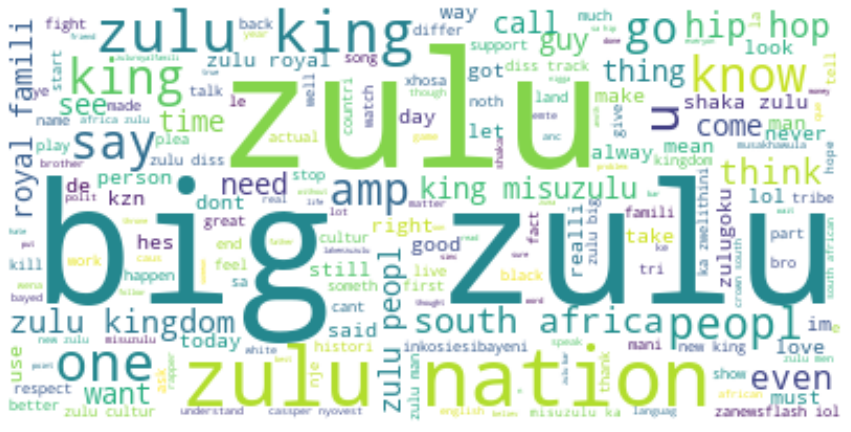

In [42]:
text = " ".join(i for i in zulu.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Checking Polarity

In [45]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
zulu["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in zulu["Text"]]
zulu["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in zulu["Text"]]
zulu["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in zulu["Text"]]
zulu = zulu[["Text", "Positive", "Negative", "Neutral"]]
print(zulu.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Mlondi
[nltk_data]     Shoba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                Text  Positive  Negative  \
0    ayotink didn't wanna bias wit slime joey badass     0.146      0.18   
1                                                        0.000      0.00   
2                               zuluwarr lie told 🤙🏾     0.000      0.00   
3   fact feel kind guilti im vers indigen africa ...     0.349      0.00   
4    new south african zulu king dismisses challeng      0.000      0.00   

   Neutral  
0    0.674  
1    0.000  
2    1.000  
3    0.651  
4    1.000  


## Positive Sentiments WordCloud

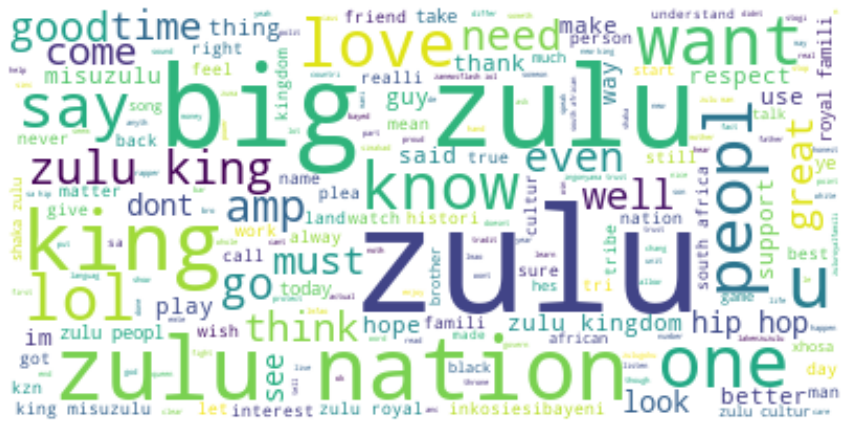

In [46]:
positive =' '.join([i for i in zulu['Text'][zulu['Positive'] > zulu["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Sentiments WordCloud

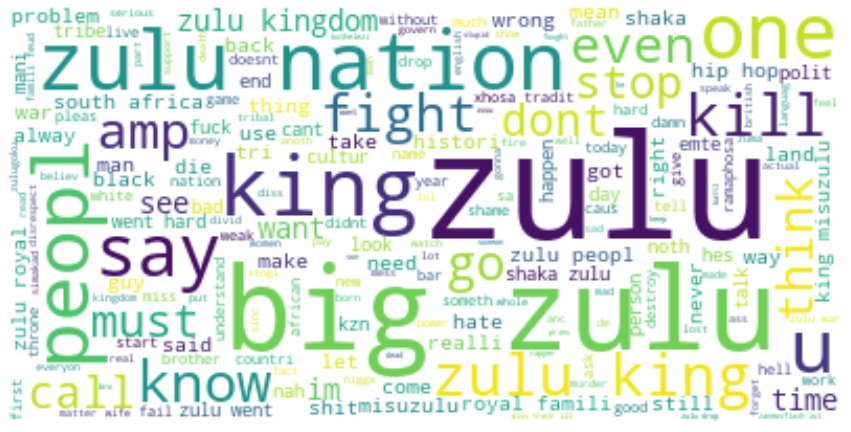

In [47]:
negative =' '.join([i for i in zulu['Text'][zulu['Negative'] > zulu["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()